In [1]:
# Import statements
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


/Users/yenori/anaconda3/envs/mydev/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/cz/_pyz_5qn69155q4_bc51whp00000gn/T/ipykernel_8977/45807504.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Create reference to CSV file
csv_path = Path("Project-_4/stroke_data.csv")


#Import the csv into a pandas DataFrame
stroke_data = pd.read_csv('stroke_data.csv')

In [3]:
# Check for null values in stroke_data
null_values = stroke_data.isnull().sum()

display(null_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
#Drop null rows
stroke_reduced_columns = stroke_data[["id", "gender", "age", "hypertension", "heart_disease", "ever_married", 
                                      "work_type", "Residence_type","avg_glucose_level", "bmi", "smoking_status", 
                                      "stroke"]]
stroke_reduced_columns

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
stroke_reduced_columns.count()


id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [6]:
# Check for null values in stroke_data
null_values = stroke_data.isnull().sum()

display(null_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#Drop null rows
no_null_stroke_data = stroke_reduced_columns.dropna(how='any')

In [8]:
#verify counts
no_null_stroke_data.count()

id                   4909
gender               4909
age                  4909
hypertension         4909
heart_disease        4909
ever_married         4909
work_type            4909
Residence_type       4909
avg_glucose_level    4909
bmi                  4909
smoking_status       4909
stroke               4909
dtype: int64

In [9]:
# Check for duplicate IDs
duplicate_ids = stroke_data['id'].duplicated().sum()

display(duplicate_ids)

0

In [10]:
# Count the number of females and males who had a stroke
female_stroke_count = stroke_data[(stroke_data['gender'] == 'Female') & (stroke_data['stroke'] == 1)].shape[0]
male_stroke_count = stroke_data[(stroke_data['gender'] == 'Male') & (stroke_data['stroke'] == 1)].shape[0]

print("Number of females who had a stroke:", female_stroke_count)
print("Number of males who had a stroke:", male_stroke_count)

Number of females who had a stroke: 141
Number of males who had a stroke: 108


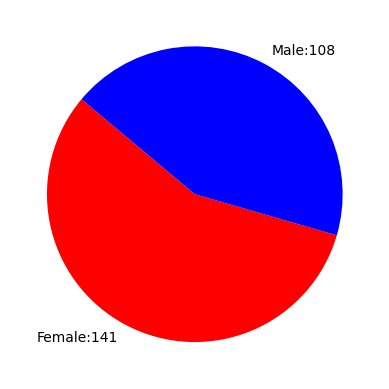

In [11]:
labels = ["Female:141", "Male:108"]
sizes = [141, 108]
colors = ["red", "blue"]
plt.pie(sizes, labels=labels, colors=colors, startangle=140)
plt.show()

In [12]:
count = stroke_data["smoking_status"].value_counts()
count

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [13]:
# Drop rows where 'smoking_status' is 'Unknown'
stroke_data = stroke_data[stroke_data['smoking_status'] != 'Unknown']

# Now 'Unknown' rows are dropped from the dataframe

print(stroke_data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5102  45010  Female  57.0             0              0          Yes   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [14]:
count = stroke_data["smoking_status"].value_counts()
count

smoking_status
never smoked       1892
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [15]:
#Create path to cleaned data csv
cleaned_csv_path = Path("Project-_4/no_null_stroke_data.csv")

#Import the csv into a pandas DataFrame
cleaned_stroke_data = pd.read_csv('no_null_stroke_data.csv')

cleaned_stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [16]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

2024-03-06 21:12:51.292792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(cleaned_stroke_data)
dummies

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,31112,80.0,0,1,105.92,32.5,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
2,60182,49.0,0,0,171.23,34.4,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
3,1665,79.0,1,0,174.12,24.0,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
4,56669,81.0,0,0,186.21,29.0,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,13.0,0,0,103.08,18.6,0,True,False,False,...,False,False,False,True,True,False,True,False,False,False
4905,44873,81.0,0,0,125.20,40.0,0,True,False,False,...,False,False,True,False,False,True,False,False,True,False
4906,19723,35.0,0,0,82.99,30.6,0,True,False,False,...,False,False,True,False,True,False,False,False,True,False
4907,37544,51.0,0,0,166.29,25.6,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False


In [18]:
# Split our preprocessed data into our features and target arrays
y = dummies.stroke

# Split the preprocessed data into a training and testing dataset
X = dummies.drop(columns = 'stroke')

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state= 1)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = 80, input_dim= input_features, activation ='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = 30, activation ='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1840      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4301 (16.80 KB)
Trainable params: 4301 (16.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [22]:
# Train the model
nn.fit(X_train_scaled,y_train, epochs = 100)

Epoch 1/100
116/116 [==============================] - 3s 6ms/step - loss: 0.2115 - accuracy: 0.9440
Epoch 2/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1436 - accuracy: 0.9590
Epoch 3/100
116/116 [==============================] - 1s 5ms/step - loss: 0.1372 - accuracy: 0.9590
Epoch 4/100
116/116 [==============================] - 1s 7ms/step - loss: 0.1338 - accuracy: 0.9595
Epoch 5/100
116/116 [==============================] - 1s 6ms/step - loss: 0.1331 - accuracy: 0.9590
Epoch 6/100
116/116 [==============================] - 2s 14ms/step - loss: 0.1293 - accuracy: 0.9590
Epoch 7/100
116/116 [==============================] - 1s 11ms/step - loss: 0.1257 - accuracy: 0.9601
Epoch 8/100
116/116 [==============================] - 1s 8ms/step - loss: 0.1241 - accuracy: 0.9601
Epoch 9/100
116/116 [==============================] - 1s 10ms/step - loss: 0.1236 - accuracy: 0.9598
Epoch 10/100
116/116 [==============================] - 1s 5ms/step - loss: 0.1252 - acc

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

39/39 - 1s - loss: 0.5260 - accuracy: 0.9202 - 928ms/epoch - 24ms/step
Loss: 0.5260146260261536, Accuracy: 0.920195460319519


In [24]:
# Adding a decision tree model

# Importing dependencies 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 'X_train_scaled', 'X_test_scaled', 'y_train', 'y_test' are already defined 
# from the linear regression model

# Define and fit the new decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluating the model
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Model Accuracy: 0.9136807817589576
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1170
           1       0.10      0.10      0.10        58

    accuracy                           0.91      1228
   macro avg       0.53      0.53      0.53      1228
weighted avg       0.92      0.91      0.91      1228

